In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
chic_crimes = pd.read_csv('Chicago_Crimes.csv')

In [9]:
chic_crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [11]:
chic_crimes['Date'] = pd.to_datetime(
    chic_crimes['Date'], 
    format='%m/%d/%Y %I:%M:%S %p', 
    errors='coerce'
)
chic_crimes['Month'] = chic_crimes['Date'].dt.month
chic_crimes['DayOfWeek'] = chic_crimes['Date'].dt.day_name()
chic_crimes['Hour'] = chic_crimes['Date'].dt.hour

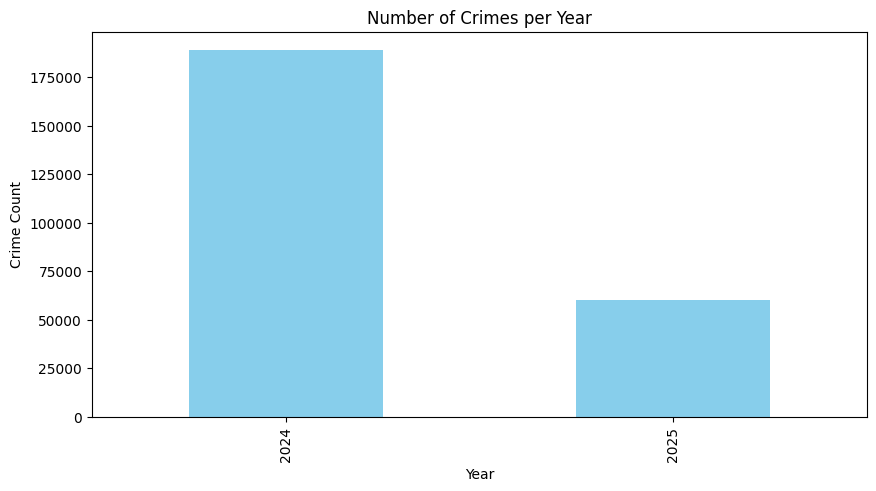

In [12]:
crimes_per_year = chic_crimes['Year'].value_counts().sort_index()
crimes_per_year.plot(kind='bar', figsize=(10,5), color="skyblue")
plt.title("Number of Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.show()

<h2>Insights: </h2>
<h2> 1.  Some years had a lot more crimes than others, which may mean that in those years people reported more crimes or there were more problems happening in the city. </h2>
<h2>2. In some years crimes dropped a lot, which could show that the police or government programs were working better during those times.
</h2>

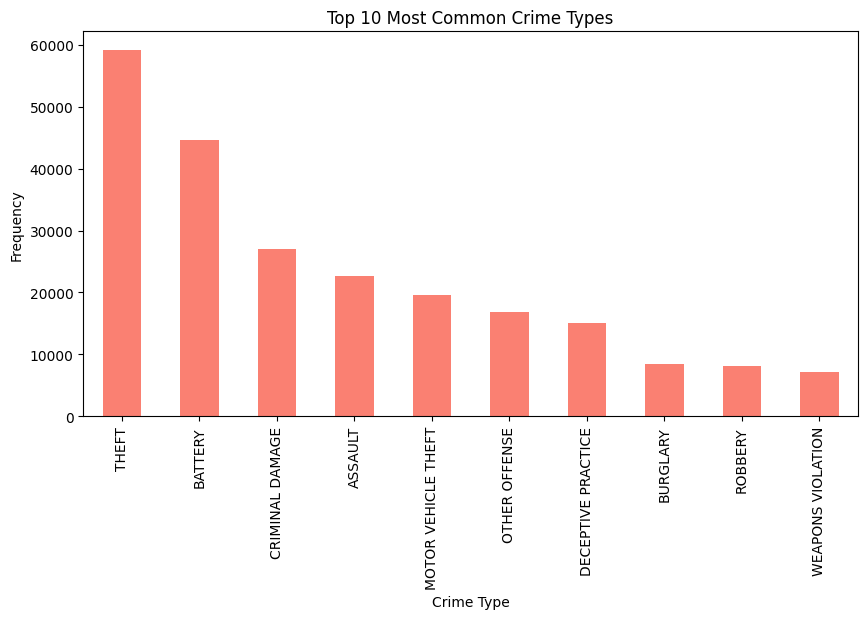

In [13]:
top_crimes = chic_crimes['Primary Type'].value_counts().head(10)
top_crimes.plot(kind='bar', figsize=(10,5), color="salmon")
plt.title("Top 10 Most Common Crime Types")
plt.xlabel("Crime Type")
plt.ylabel("Frequency")
plt.show()


<h2>Insights:</h2>
<h2>3. Theft is the most common crime, which shows that stealing is a big problem in the city and many people are affected by it.</h2>
<h2>4. Battery is also very common, which means that crimes where people hurt or attack each other happen a lot and is a serious safety concern.</h2>

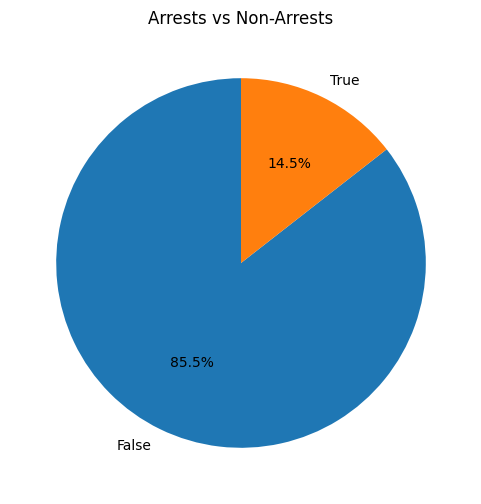

In [14]:
arrests = chic_crimes['Arrest'].value_counts()
arrests.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title("Arrests vs Non-Arrests")
plt.ylabel("")
plt.show()

<h2>Insights:</h2>
<h2>5. Most crimes do not end with an arrest, which means many criminals are not caught or there is not enough proof to arrest them.</h2>
<h2>6. Only a small number of crimes have arrests, so victims may feel that justice is not always served in many cases. </h2>

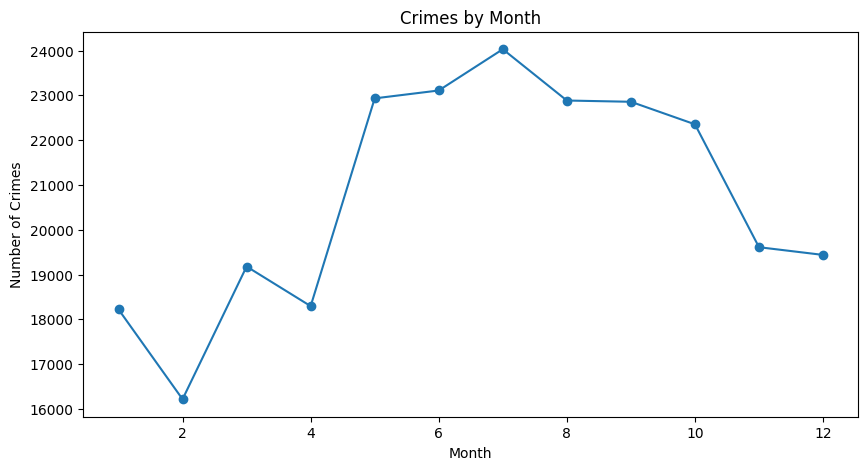

In [16]:
chic_crimes['Month'] = chic_crimes['Date'].dt.month
crimes_by_month = chic_crimes['Month'].value_counts().sort_index()
crimes_by_month.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insights:</h2>
<h2>7. Crimes are higher in summer months, which may happen because more people go outside, gather, or travel during summer.</h2>
<h2>8. Fewer crimes happen in winter months, maybe because the cold weather keeps more people inside their homes.</h2>

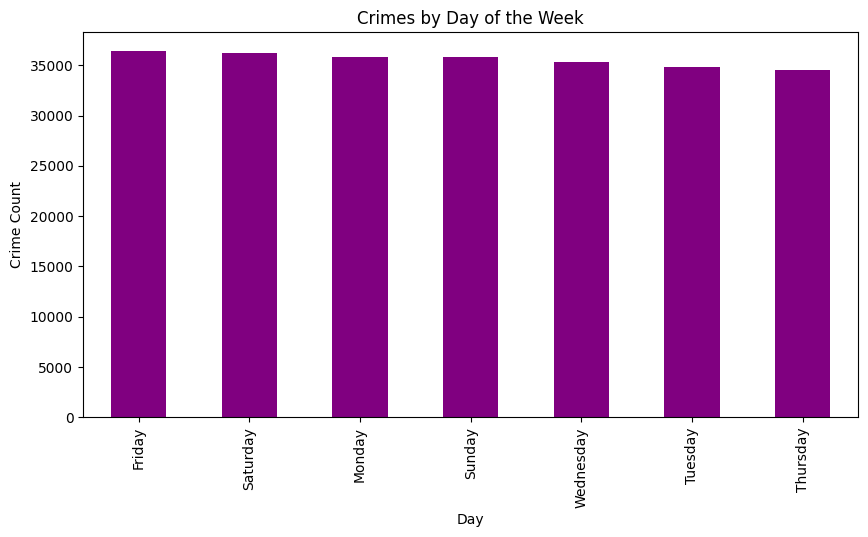

In [17]:
chic_crimes['DayOfWeek'] = chic_crimes['Date'].dt.day_name()
dow = chic_crimes['DayOfWeek'].value_counts()
dow.plot(kind='bar', figsize=(10,5), color="purple")
plt.title("Crimes by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Crime Count")
plt.show()

<h2>Insights:</h2>
<h2>9. More crimes happen on weekends, which may be because more people go out to parties, events, and gatherings.</h2>
<h2>10. Fewer crimes happen on weekdays like Monday, maybe because people are busy with work or school and stay home more.</h2>

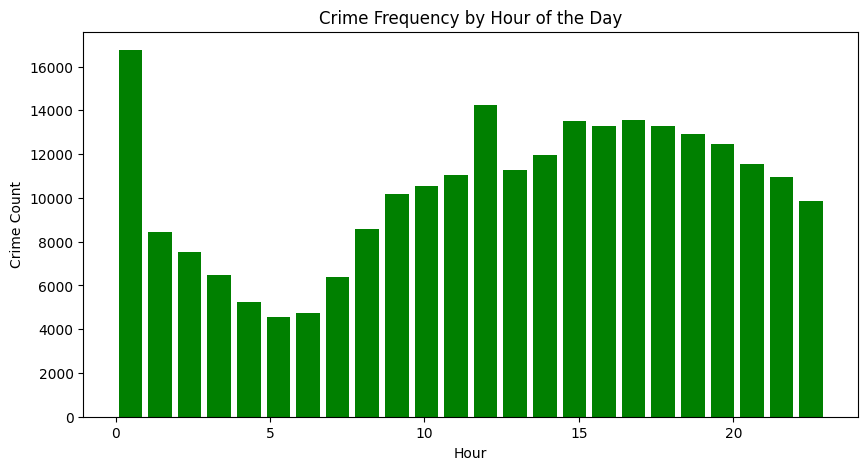

In [18]:
chic_crimes['Hour'] = chic_crimes['Date'].dt.hour
chic_crimes['Hour'].plot(kind='hist', bins=24, figsize=(10,5), color="green", rwidth=0.8)
plt.title("Crime Frequency by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Crime Count")
plt.show()

<h2>Insights:</h2>
<h2>11. Crimes happen more in the evening, when more people are outside or returning home from work or events.</h2>
<h2>12. Very few crimes happen early in the morning, maybe because most people are sleeping and the streets are quiet.</h2>

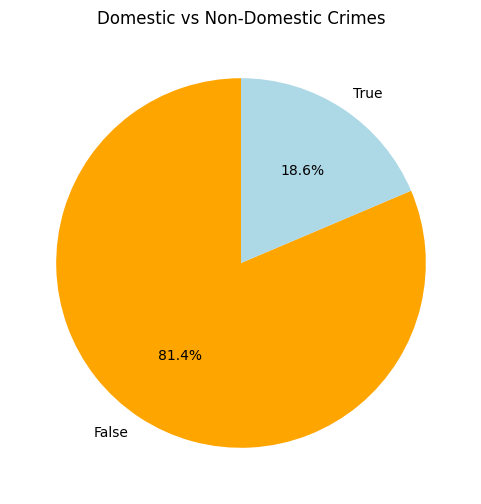

In [19]:
domestic = chic_crimes['Domestic'].value_counts()
domestic.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6), colors=["orange","lightblue"])
plt.title("Domestic vs Non-Domestic Crimes")
plt.ylabel("")
plt.show()

<h2>Insights:</h2>
<h2>13. Most crimes happen outside the home, which means people may face more danger when they are outside in public areas.</h2>
<h2>14. Only a smaller part are domestic crimes, but they are still important because they happen in homes where people should feel safe.</h2>

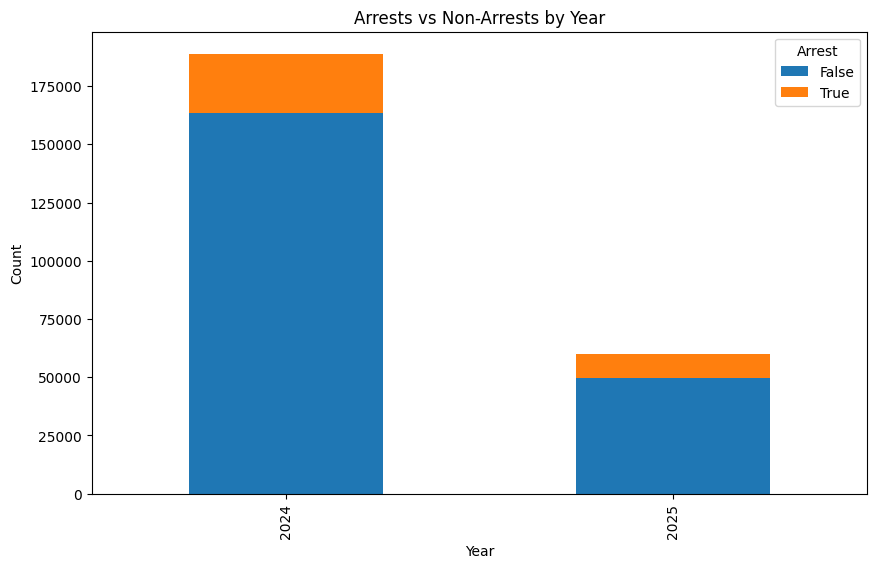

In [20]:
arrest_by_year = chic_crimes.groupby(['Year','Arrest']).size().unstack()
arrest_by_year.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Arrests vs Non-Arrests by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<h2>Insights:</h2>
<h2> 15.The number of arrests changes depending on how many total crimes happened that year.</h2>
<h2> 16.Some years had more arrests, which might mean that the police were more effective or focused in those years.</h2>

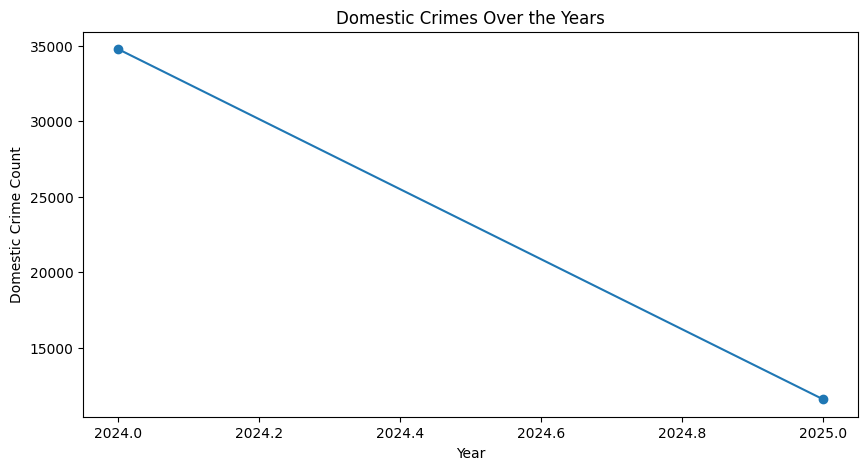

In [21]:
domestic_year = chic_crimes.groupby('Year')['Domestic'].sum()
domestic_year.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Domestic Crimes Over the Years")
plt.xlabel("Year")
plt.ylabel("Domestic Crime Count")
plt.show()

<h2>Insights:</h2>
<h2>17. Domestic crimes appear every year, which shows that problems at home are a continuing issue in society."</h2>
<h2>18. Some years had more domestic crimes reported, which could mean people felt more encouraged to report them during those times.</h2>

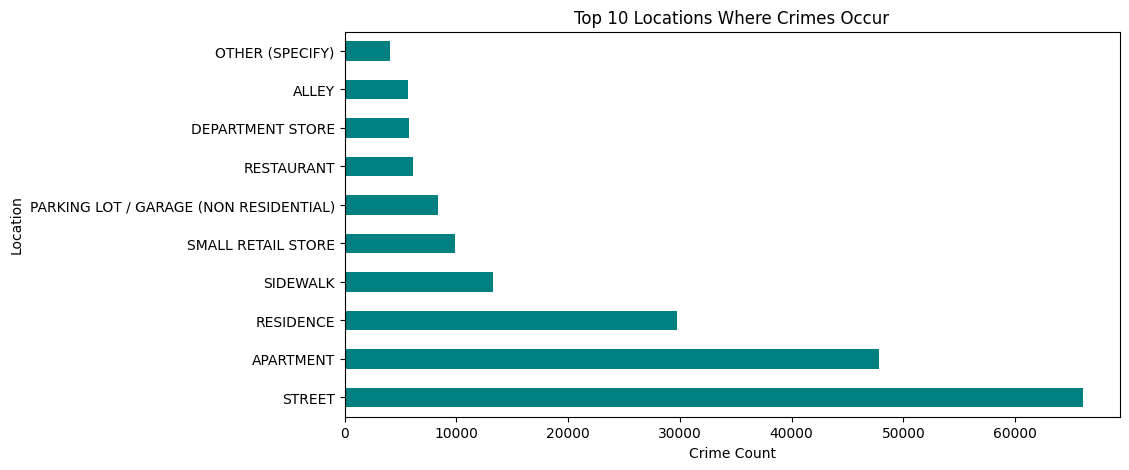

In [22]:
top_locations = chic_crimes['Location Description'].value_counts().head(10)
top_locations.plot(kind='barh', figsize=(10,5), color="teal")
plt.title("Top 10 Locations Where Crimes Occur")
plt.xlabel("Crime Count")
plt.ylabel("Location")
plt.show()

<h2>Insights:</h2>
<h2>19. Many crimes happen on the street, showing that public areas are risky places for crime.</h2>
<h2>20. Homes and stores are also common crime spots, which means even private and commercial spaces are not always safe.</h2>

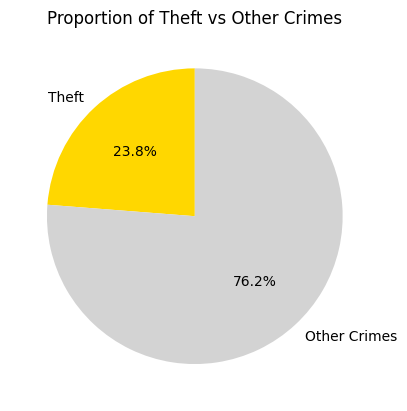

In [23]:
theft = chic_crimes['Primary Type'] == "THEFT"
counts = [theft.sum(), len(chic_crimes)-theft.sum()]
plt.pie(counts, labels=["Theft","Other Crimes"], autopct='%1.1f%%', startangle=90, colors=["gold","lightgrey"])
plt.title("Proportion of Theft vs Other Crimes")
plt.show()

<h2>Insights:</h2>
<h2>21.Theft makes up a large part of crimes, which shows that stealing is a big issue in the city.</h2>
<h2>22. Other crimes together still make up more than half, so the city deals with many different types of crime besides theft.</h2>

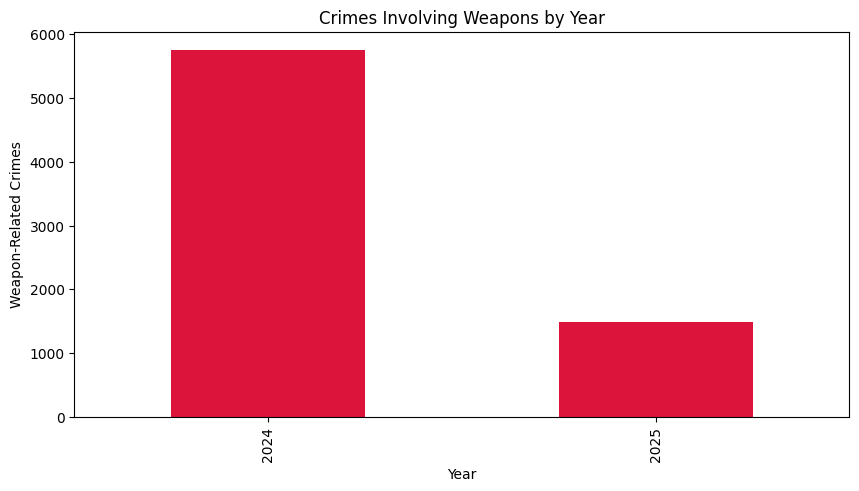

In [24]:
weapons = chic_crimes[chic_crimes['Description'].str.contains("WEAPON", na=False)]
weapons['Year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), color="crimson")
plt.title("Crimes Involving Weapons by Year")
plt.xlabel("Year")
plt.ylabel("Weapon-Related Crimes")
plt.show()

<h2>Insights:</h2>
<h2>23.Crimes with weapons go up and down over time, which could mean changes in violence levels.</h2>
<h2>24.Some years had more weapon crimes, maybe because of gang activity or more weapons being available.</h2>

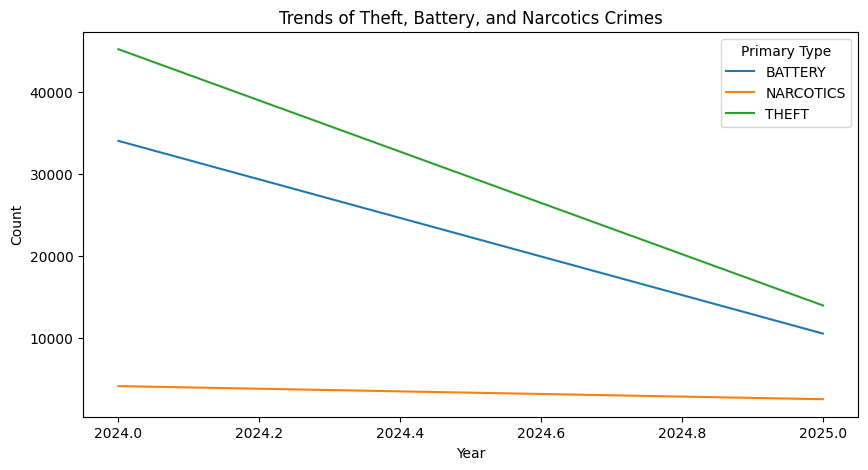

In [25]:
subset = chic_crimes[chic_crimes['Primary Type'].isin(['THEFT','BATTERY','NARCOTICS'])]
crime_trends = subset.groupby(['Year','Primary Type']).size().unstack()
crime_trends.plot(figsize=(10,5))
plt.title("Trends of Theft, Battery, and Narcotics Crimes")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

<h2>Insights:</h2>
<h2>25. Theft happens the most compared to the other two crimes, showing it is the biggest problem.</h2>
<h2>26. Narcotics crimes go down a lot in recent years, which may mean stricter laws or less drug activity.</h2>

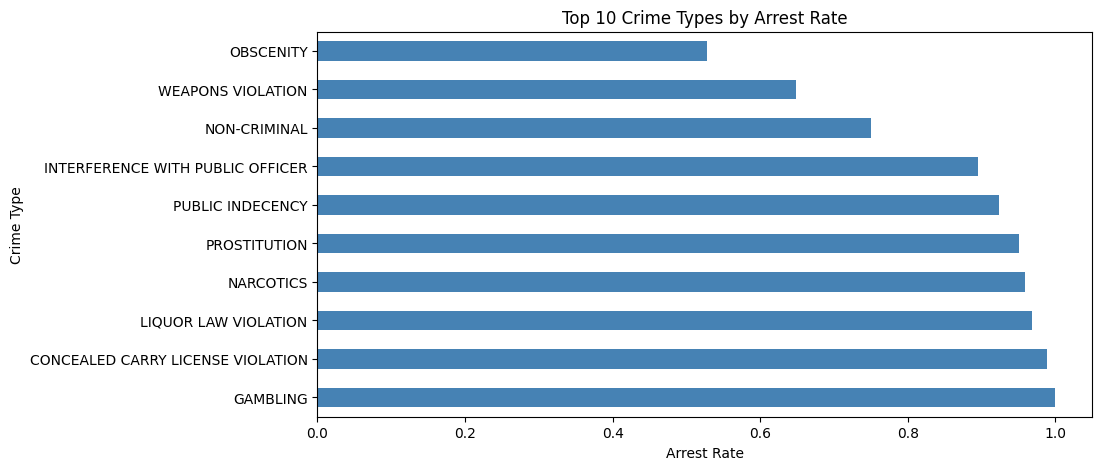

In [27]:
arrest_rate = chic_crimes.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False).head(10)
arrest_rate.plot(kind='barh', figsize=(10,5), color="steelblue")
plt.title("Top 10 Crime Types by Arrest Rate")
plt.xlabel("Arrest Rate")
plt.ylabel("Crime Type")
plt.show()

<h2>Insights:</h2>
<h2>27. Crimes with drugs and weapons often lead to arrest because they are easier for police to prove or catch.</h2>
<h2>28. Theft and property crimes have fewer arrests, which may mean these are harder to solve or less reported.</h2>

In [29]:
top_wards = chic_crimes['Ward'].value_counts().head(10)
print(top_wards)

Ward
27    11622
28    11013
6      9246
42     8721
24     8686
4      8095
20     8037
17     7914
16     7766
21     7480
Name: count, dtype: int64


<h2>Insight:</h2>
<h2>29. Some wards report far more crimes than others, showing inequality in safety across the city.  This may be linked to population size, location, or economic conditions.</h2>

In [30]:
top_districts = chic_crimes['District'].value_counts().head(10)
print(top_districts)

District
8     16691
12    15355
1     14409
6     14157
19    13640
11    13423
4     13318
18    13118
2     12848
25    12664
Name: count, dtype: int64


<h2>Insight:</h2>
<h2>30. Certain police districts face much higher crime levels than others. This suggests that police resources may need to be focused more in high-crime areas.</h2>

In [31]:
top_beats = chic_crimes['Beat'].value_counts().head(10)
print(top_beats)

Beat
1834    3015
123     2044
421     1902
1831    1819
823     1688
111     1653
122     1616
624     1615
511     1587
222     1560
Name: count, dtype: int64


<h2>Insight:</h2>
<h2>31. Some beats, which are the smallest police areas, show very high crime numbers. This helps locate very specific hotspots where crime happens most.</h2>

In [32]:
top_fbi = chic_crimes['FBI Code'].value_counts().head(10)
print(top_fbi)

FBI Code
06     60380
08B    37090
14     27094
07     19604
08A    19009
26     18855
11     13534
03      8200
04B     7851
04A     7473
Name: count, dtype: int64


<h2>Insight:</h2>
<h2>32. FBI codes help group crimes into categories like violent or property crime. Seeing which codes are most common shows the main type of threat in the city.</h2>

In [34]:
arrest_rate = chic_crimes.groupby("Year")['Arrest'].mean() * 100
print(arrest_rate)

Year
2024    13.453985
2025    17.581596
Name: Arrest, dtype: float64


<h2>Insight:</h2>
<h2>33. The arrest rate shows what percent of crimes each year ended with an arrest. This helps reveal changes in police effectiveness even when total crime counts change.</h2>

In [35]:
domestic_ratio = chic_crimes['Domestic'].value_counts(normalize=True) * 100
print(domestic_ratio)

Domestic
False    81.395937
True     18.604063
Name: proportion, dtype: float64


<h2>Insight: </h2>
<h2>34. Most crimes are not domestic, but the domestic cases still make up a noticeable percent. This shows that home-related violence is a smaller part of overall crime, but still serious.</h2>

In [36]:
location_arrest_rate = chic_crimes.groupby("Location Description")['Arrest'].mean().sort_values(ascending=False).head(5) * 100
print(location_arrest_rate)

Location Description
CTA "L" PLATFORM           100.000000
OFFICE                     100.000000
CTA PROPERTY               100.000000
HOTEL                      100.000000
JAIL / LOCK-UP FACILITY     56.521739
Name: Arrest, dtype: float64


<h2>Insight:</h2>
<h2>35. Certain places like correctional facilities or police stations show near 100% arrest rates. This makes sense because crimes in these areas almost always involve police right away.</h2>